Loaded file: 1501.npy
Shape of EEG data: (19, 500)


<Figure size 1000x600 with 0 Axes>

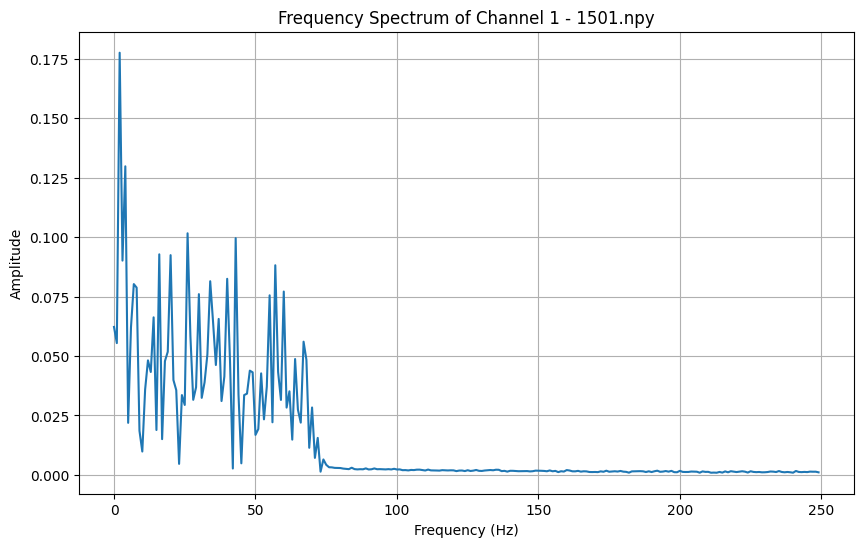

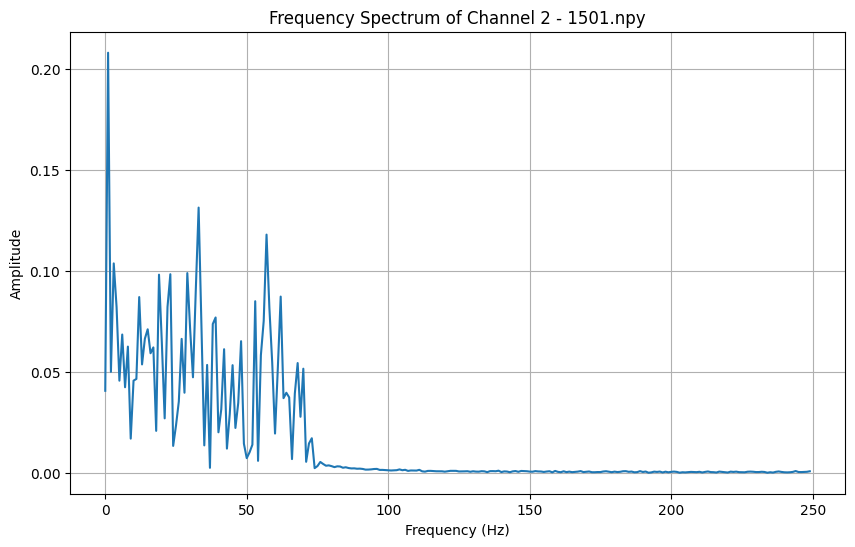

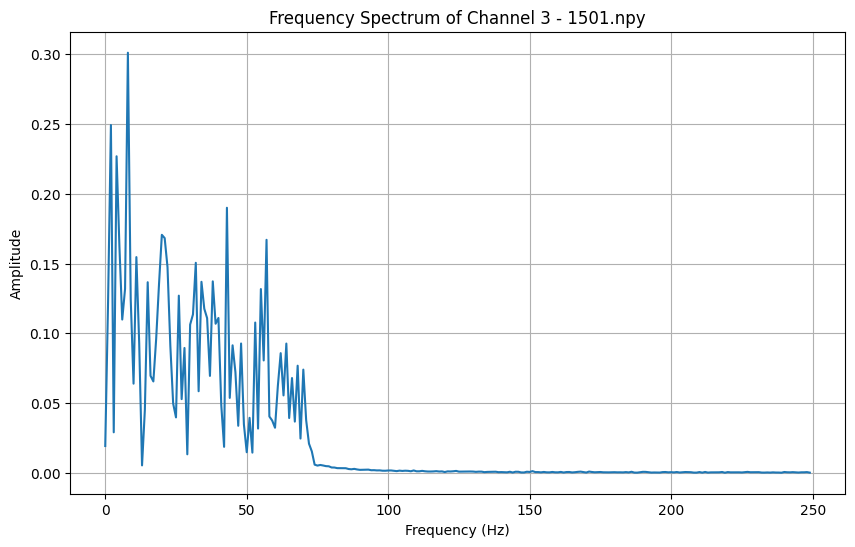

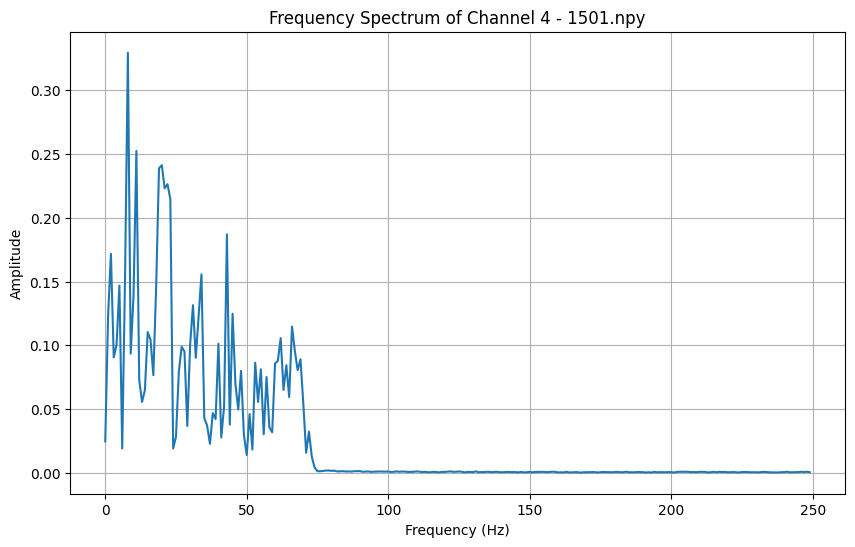

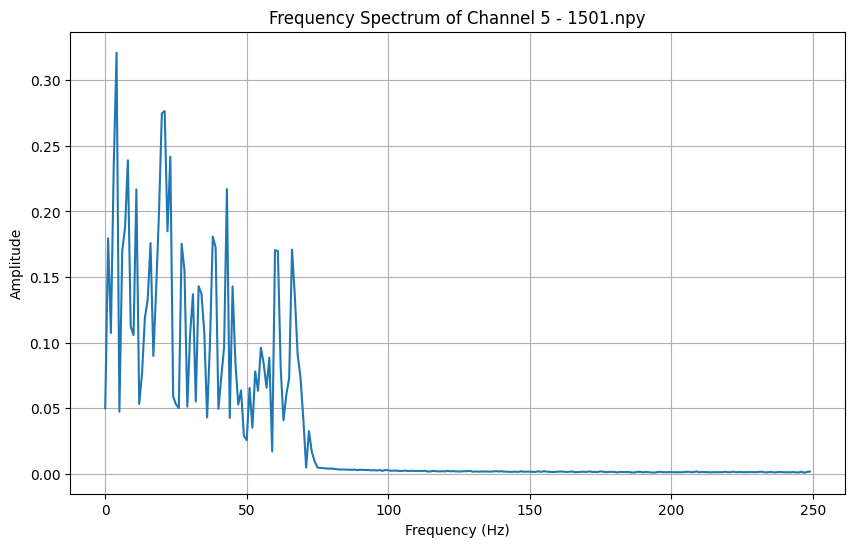

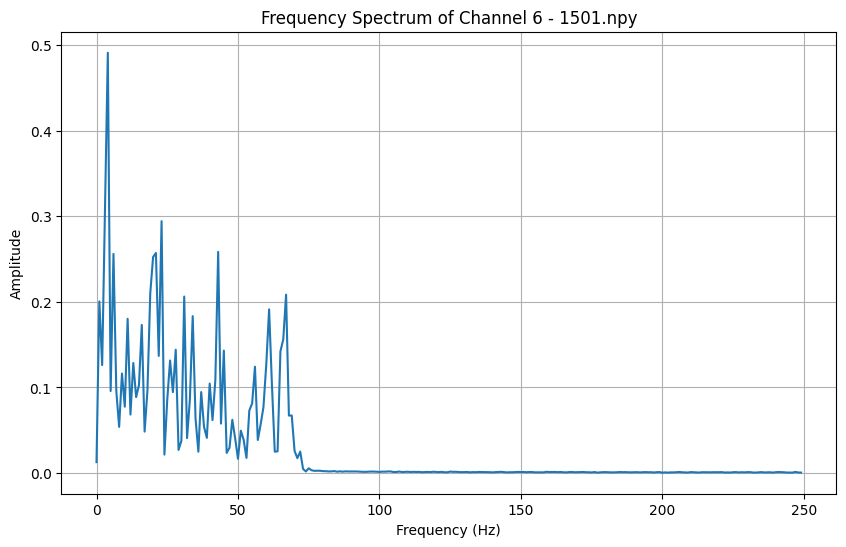

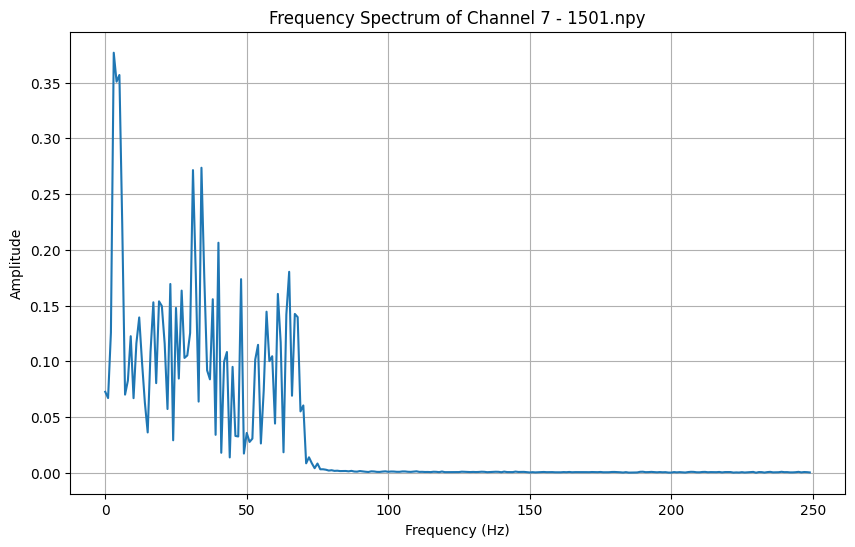

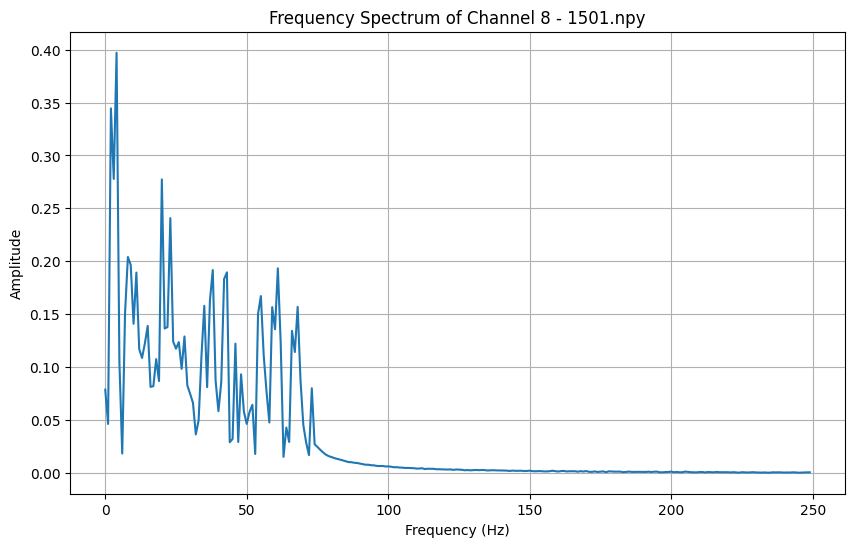

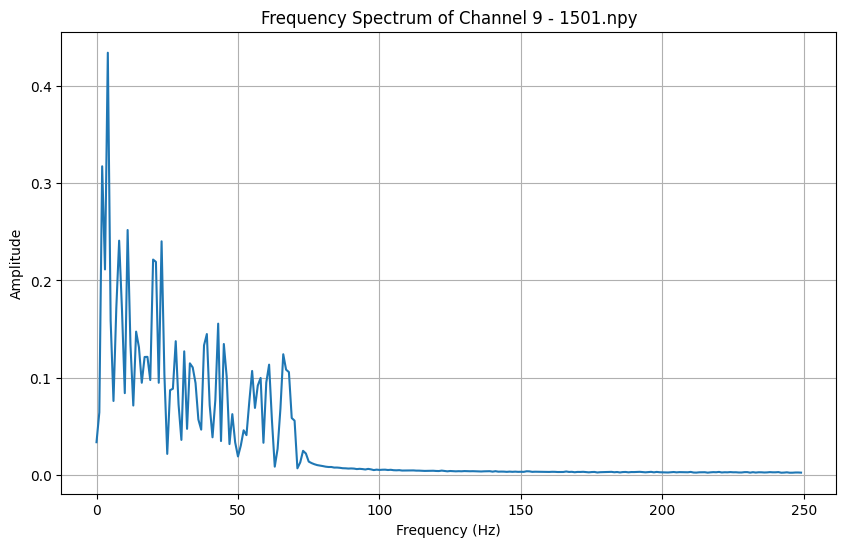

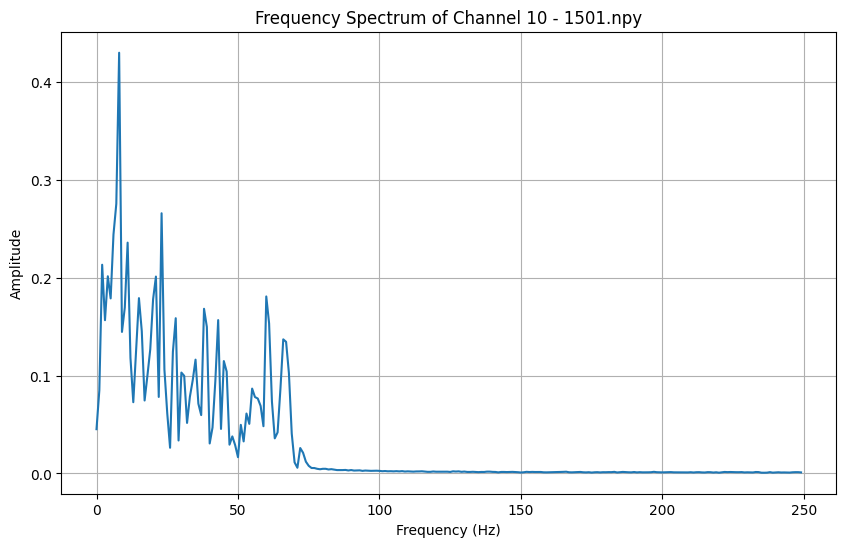

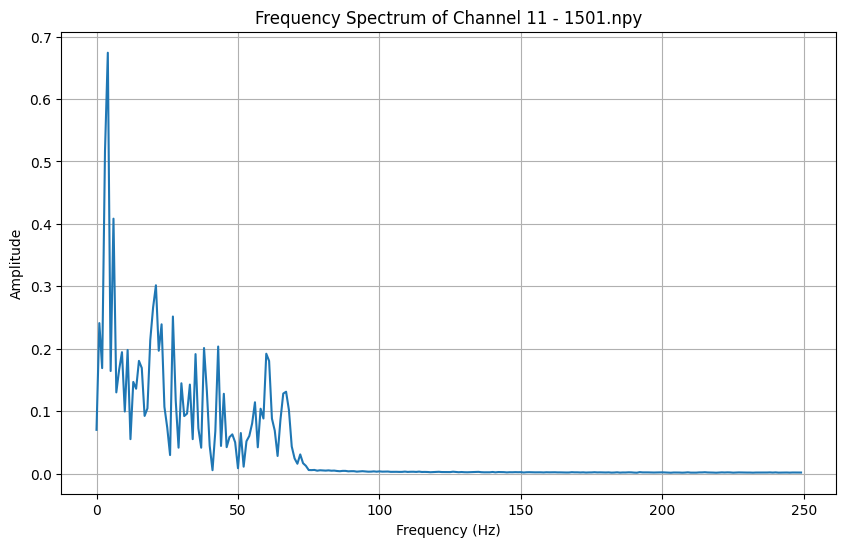

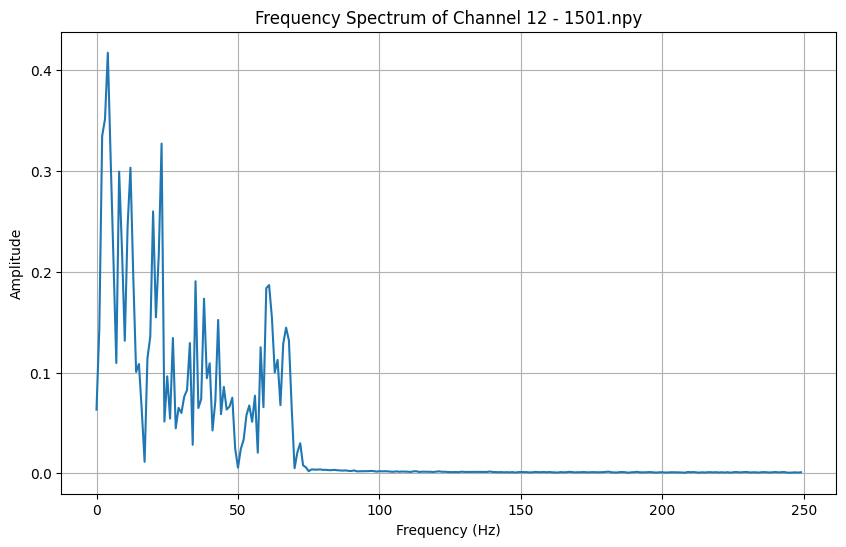

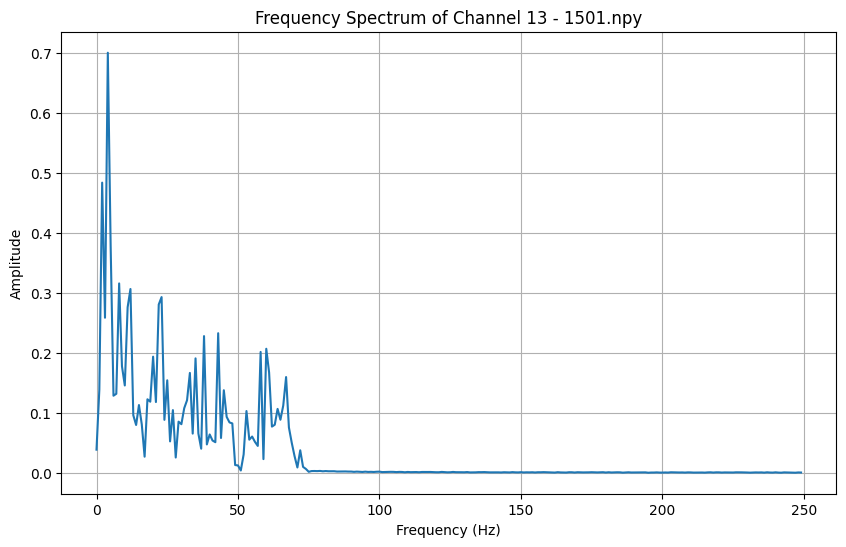

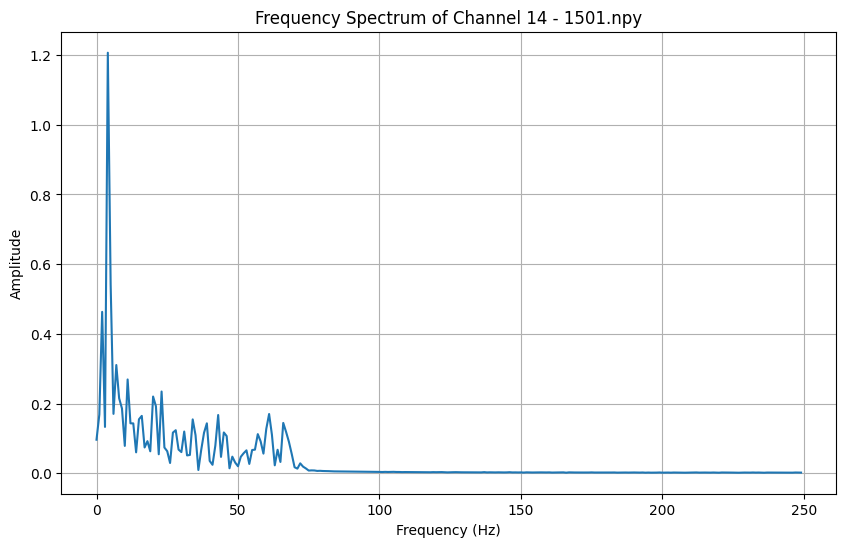

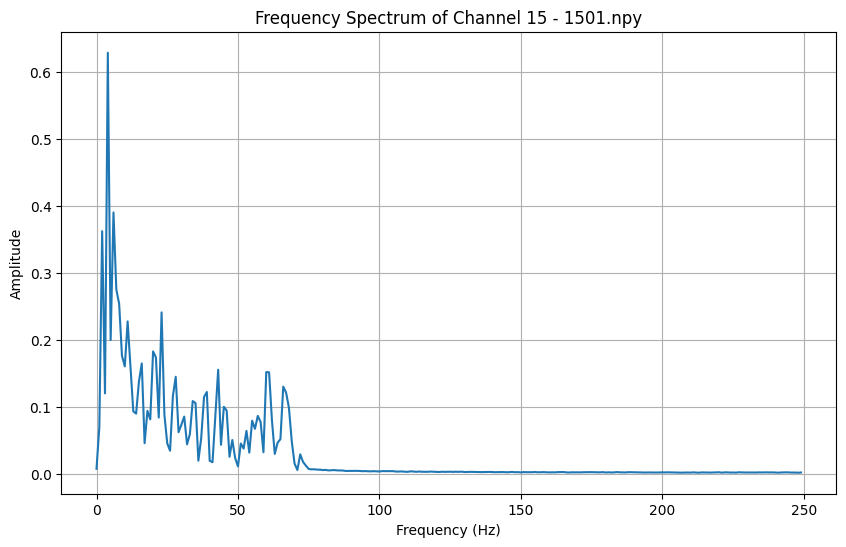

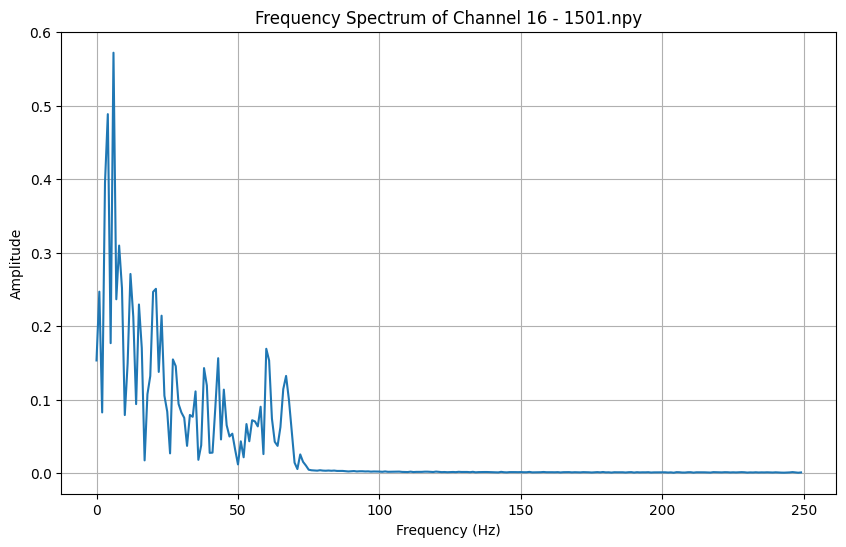

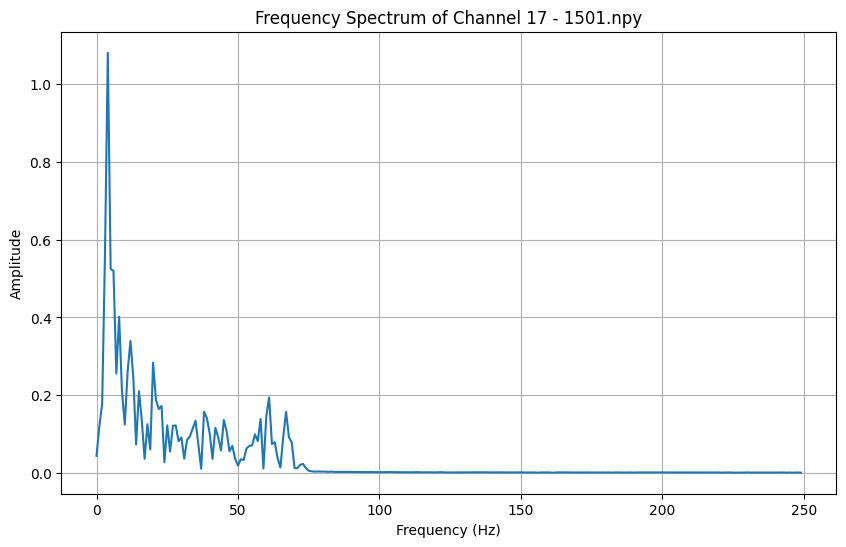

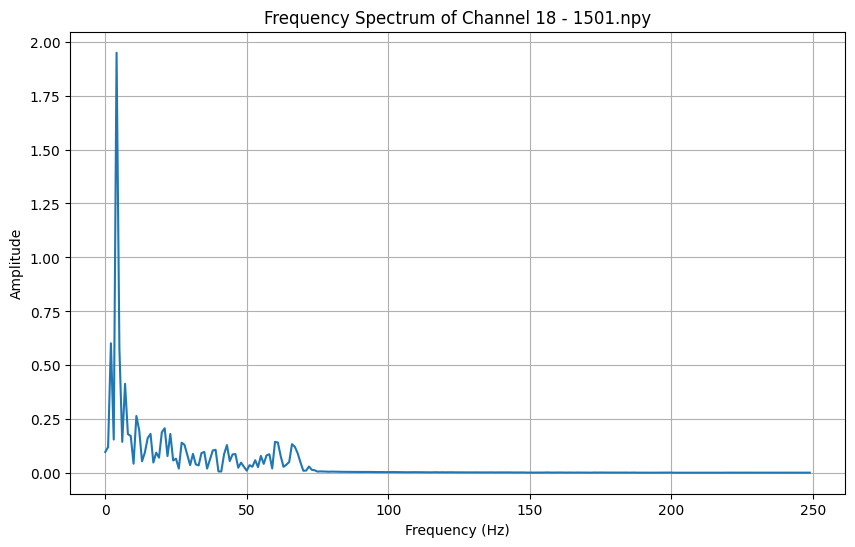

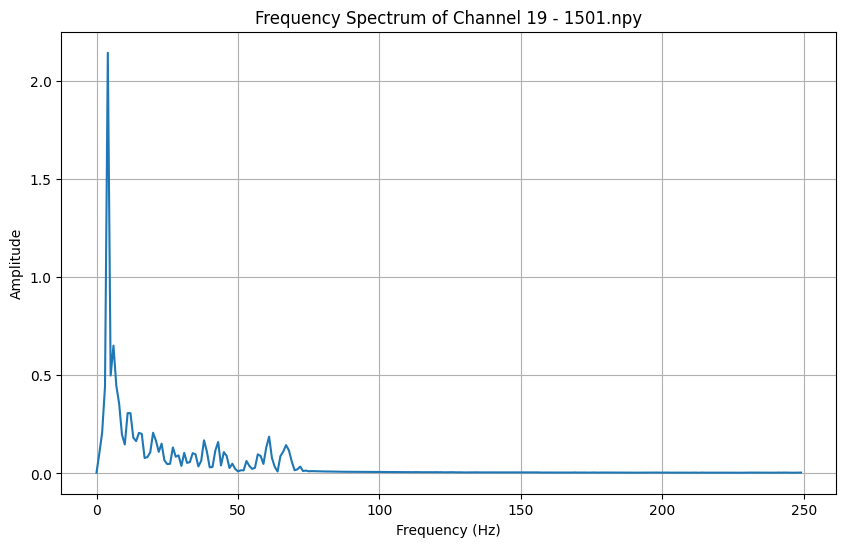

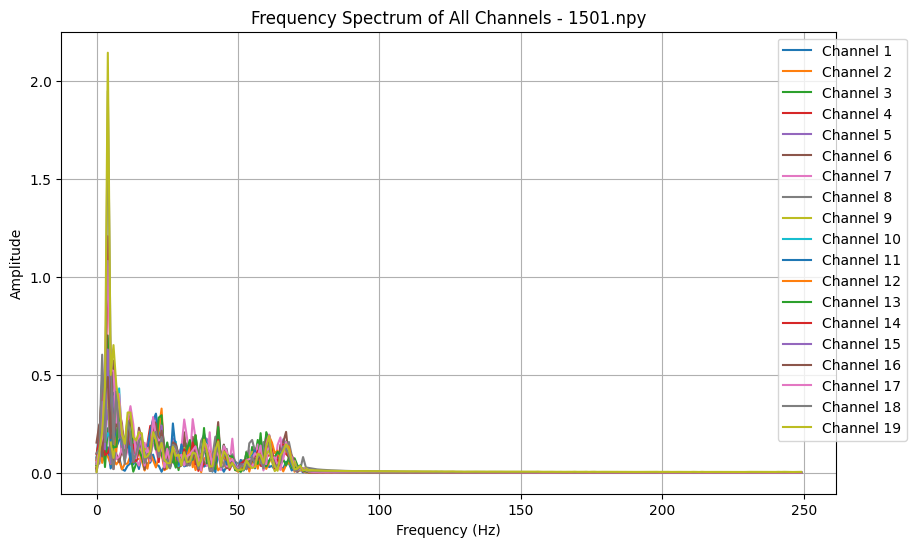

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt   #import the stuff
from scipy.fft import fft, fftfreq

# Path to the folder containing .npy files
train_data_path = "/content/"

# List all .npy files in the folder
file_list = [f for f in os.listdir(train_data_path) if f.endswith('.npy')]

# Load one file
file_path = os.path.join(train_data_path, file_list[0])
eeg_data = np.load(file_path)  # Shape: (19, 500)

print(f"Loaded file: {file_list[0]}")
print(f"Shape of EEG data: {eeg_data.shape}")  # (19 channels, 500 time points)

# Fourier Transform Parameters
sampling_rate = 500
n = eeg_data.shape[1]

# figure for superimposed graph
plt.figure(figsize=(10, 6))

# Compute and plot FFT for each channel separately
for channel in range(eeg_data.shape[0]):  # Iterate over 19 channels
    signal = eeg_data[channel, :]
    frequencies = fftfreq(n, d=1/sampling_rate)  # Frequency bins
    fft_values = np.abs(fft(signal))  # Magnitudes of the FFT

    # Take only the positive frequencies (one-sided spectrum)
    positive_freqs = frequencies[:n//2]
    positive_fft_values = fft_values[:n//2]

    # Plot the FFT for the current channel
    plt.figure(figsize=(10, 6))
    plt.plot(positive_freqs, positive_fft_values)
    plt.title(f"Frequency Spectrum of Channel {channel+1} - {file_list[0]}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

# Now, plotting all channels together on the 20th superimposed graph
plt.figure(figsize=(10, 6))
for channel in range(eeg_data.shape[0]):  # Iterate over 19 channels
    signal = eeg_data[channel, :]
    frequencies = fftfreq(n, d=1/sampling_rate)  # Frequency bins
    fft_values = np.abs(fft(signal))  # Magnitudes of the FFT

    #only the positive frequencies (one-sided spectrum)
    positive_freqs = frequencies[:n//2]
    positive_fft_values = fft_values[:n//2]

    # Superimpose all channels on the same plot
    plt.plot(positive_freqs, positive_fft_values, label=f"Channel {channel+1}")

# Customize
plt.title(f"Frequency Spectrum of All Channels - {file_list[0]}")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.grid()

# Display the superimposed plot
plt.show()


above was FFT for the normal class. below is it's spectogram

---



Loaded file: 1501.npy
Shape of EEG data: (19, 500)


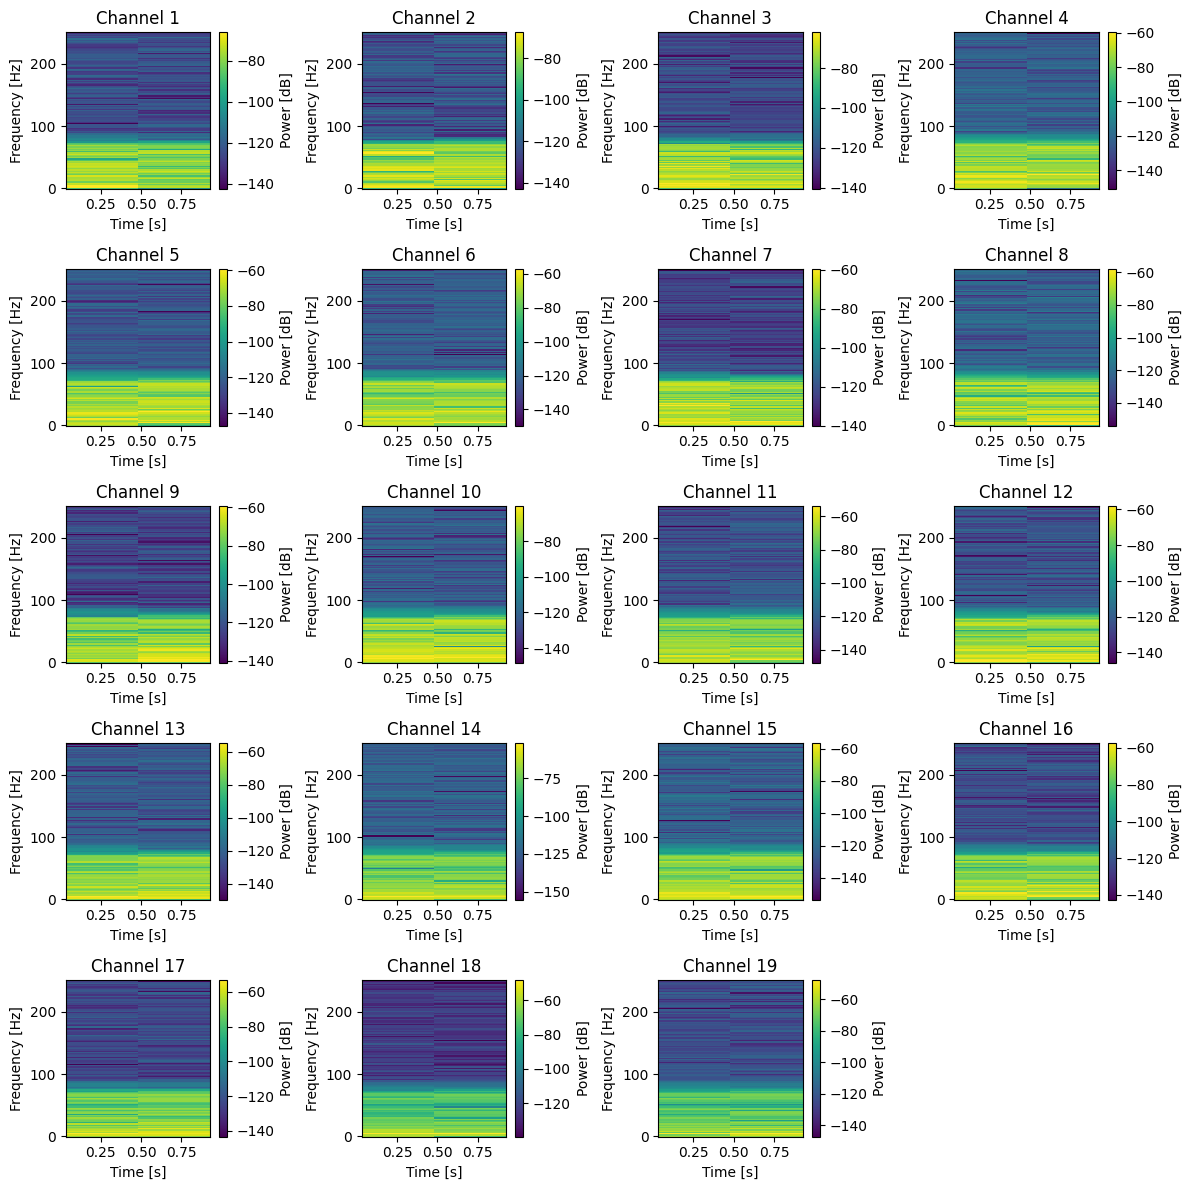

In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Path to the folder containing .npy files (update path if necessary)
train_data_path = "/content/"  # Update this to your actual folder path

# Select one .npy file (for example, the first one in the list)
file_list = [f for f in os.listdir(train_data_path) if f.endswith('.npy')]
file_path = os.path.join(train_data_path, file_list[0])
eeg_data = np.load(file_path)  # Shape: (19 channels, 500 time points)

print(f"Loaded file: {file_list[0]}")
print(f"Shape of EEG data: {eeg_data.shape}")  # (19 channels, 500 time points)

# Parameters for Spectrogram
sampling_rate = 500  # Sampling rate in Hz (500 Hz as per your data)

# Create a new figure for plotting the spectrograms
plt.figure(figsize=(12, 12))

# Loop through all 19 channels and generate spectrograms
for channel in range(eeg_data.shape[0]):  # 19 channels
    plt.subplot(5, 4, channel + 1)  # Create a 5x4 grid of subplots (for 19 channels)

    # Get the signal for the current channel
    signal = eeg_data[channel, :]

    # Generate the spectrogram (using scipy's spectrogram function)
    f, t, Sxx = spectrogram(signal, fs=sampling_rate)

    # Plot the spectrogram
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='auto')  # Convert power to dB scale
    plt.title(f"Channel {channel + 1}")
    plt.xlabel('Time [s]')
    plt.ylabel('Frequency [Hz]')
    plt.colorbar(label='Power [dB]')

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()
